In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [2]:
dataframe=pd.read_csv("file:///C:/Users/Tarun/Downloads/car.data",
                      header=None,
                      names=['buying_price','maintainance_price','no_of_doors','person_capacity',
                      'luggage_boot','safety_of_car','class'])

result_class=dataframe['class']

dataframe.drop(['class'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
buying_price          1728 non-null object
maintainance_price    1728 non-null object
no_of_doors           1728 non-null object
person_capacity       1728 non-null object
luggage_boot          1728 non-null object
safety_of_car         1728 non-null object
dtypes: object(6)
memory usage: 81.1+ KB


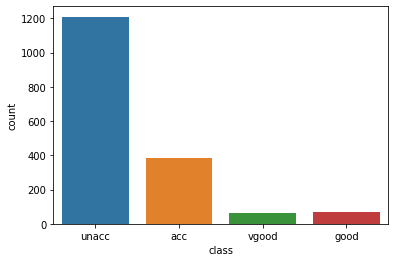

In [3]:
dataframe.info()
sns.countplot(x=result_class,data=dataframe)

In [4]:
dataframe.isna().sum()

buying_price          0
maintainance_price    0
no_of_doors           0
person_capacity       0
luggage_boot          0
safety_of_car         0
dtype: int64

In [5]:
dataframe.describe()

,buying_price,maintainance_price,no_of_doors,person_capacity,luggage_boot,safety_of_car
count,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3
top,vhigh,vhigh,4,4,big,high
freq,432,432,432,576,576,576


In [6]:
dataframe.head()

,buying_price,maintainance_price,no_of_doors,person_capacity,luggage_boot,safety_of_car
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [7]:
dataframe.buying_price.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [8]:
mapping_values={'vhigh':4,'high':3,'med':2,'low':1}

In [9]:
dataframe.buying_price=[mapping_values[item] for item in dataframe.buying_price]

In [10]:
dataframe.buying_price.unique()

array([4, 3, 2, 1], dtype=int64)

In [11]:
dataframe.maintainance_price.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [12]:
dataframe.maintainance_price=[mapping_values[item] for item in dataframe.maintainance_price]

In [13]:
dataframe.maintainance_price.unique()

array([4, 3, 2, 1], dtype=int64)

In [14]:
dataframe.head()

,buying_price,maintainance_price,no_of_doors,person_capacity,luggage_boot,safety_of_car
0,4,4,2,2,small,low
1,4,4,2,2,small,med
2,4,4,2,2,small,high
3,4,4,2,2,med,low
4,4,4,2,2,med,med


In [15]:
dataframe.no_of_doors.unique()

array(['2', '3', '4', '5more'], dtype=object)

In [16]:
dataframe.person_capacity.unique()

array(['2', '4', 'more'], dtype=object)

In [17]:
dataframe.no_of_doors.factorize()

(array([0, 0, 0, ..., 3, 3, 3], dtype=int64),
 Index(['2', '3', '4', '5more'], dtype='object'))

In [18]:
dataframe.no_of_doors.unique()

array(['2', '3', '4', '5more'], dtype=object)

In [19]:
pd.factorize(dataframe.no_of_doors)

(array([0, 0, 0, ..., 3, 3, 3], dtype=int64),
 Index(['2', '3', '4', '5more'], dtype='object'))

In [20]:
dataframe.no_of_doors,a=dataframe.no_of_doors.factorize()

In [21]:
dataframe.no_of_doors.unique()

array([0, 1, 2, 3], dtype=int64)

In [22]:
dataframe.person_capacity,a=dataframe.person_capacity.factorize()

In [23]:
dataframe.luggage_boot,a=dataframe.luggage_boot.factorize()

In [24]:
dataframe.safety_of_car,a=dataframe.safety_of_car.factorize()

In [25]:
#dataframe['class'],a=dataframe['class'].factorize()

In [26]:
dataframe.describe()

,buying_price,maintainance_price,no_of_doors,person_capacity,luggage_boot,safety_of_car
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,2.500000,2.500000,1.500000,1.000000,1.000000,1.000000
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,1.750000,0.750000,0.000000,0.000000,0.000000
50%,2.500000,2.500000,1.500000,1.000000,1.000000,1.000000
75%,3.250000,3.250000,2.250000,2.000000,2.000000,2.000000
max,4.000000,4.000000,3.000000,2.000000,2.000000,2.000000


In [27]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
buying_price          1728 non-null int64
maintainance_price    1728 non-null int64
no_of_doors           1728 non-null int64
person_capacity       1728 non-null int64
luggage_boot          1728 non-null int64
safety_of_car         1728 non-null int64
dtypes: int64(6)
memory usage: 81.1 KB


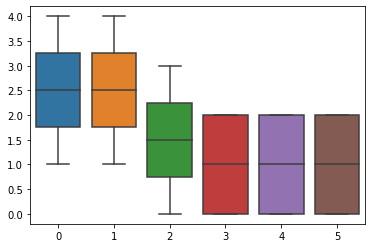

In [28]:
sns.boxplot(data=[dataframe['buying_price'],dataframe['maintainance_price'],dataframe['no_of_doors'],
                  dataframe['person_capacity'],dataframe['luggage_boot'],dataframe['safety_of_car']])

In [29]:
dataframe = pd.get_dummies(dataframe, columns = ['buying_price', 'maintainance_price',
                                                 'no_of_doors', 'person_capacity', 'luggage_boot', 
                                                'safety_of_car'])

In [30]:
dataframe.head()

,buying_price_1,buying_price_2,buying_price_3,buying_price_4,maintainance_price_1,maintainance_price_2,maintainance_price_3,maintainance_price_4,no_of_doors_0,no_of_doors_1,...,no_of_doors_3,person_capacity_0,person_capacity_1,person_capacity_2,luggage_boot_0,luggage_boot_1,luggage_boot_2,safety_of_car_0,safety_of_car_1,safety_of_car_2
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0


In [31]:
# checking the percentage of missing values in each variable
dataframe.isnull().sum()/len(dataframe)*100

buying_price_1          0.0
buying_price_2          0.0
buying_price_3          0.0
buying_price_4          0.0
maintainance_price_1    0.0
maintainance_price_2    0.0
maintainance_price_3    0.0
maintainance_price_4    0.0
no_of_doors_0           0.0
no_of_doors_1           0.0
no_of_doors_2           0.0
no_of_doors_3           0.0
person_capacity_0       0.0
person_capacity_1       0.0
person_capacity_2       0.0
luggage_boot_0          0.0
luggage_boot_1          0.0
luggage_boot_2          0.0
safety_of_car_0         0.0
safety_of_car_1         0.0
safety_of_car_2         0.0
dtype: float64

In [32]:
#Check the vaiance of each feature
dataframe.var()

buying_price_1          0.187609
buying_price_2          0.187609
buying_price_3          0.187609
buying_price_4          0.187609
maintainance_price_1    0.187609
maintainance_price_2    0.187609
maintainance_price_3    0.187609
maintainance_price_4    0.187609
no_of_doors_0           0.187609
no_of_doors_1           0.187609
no_of_doors_2           0.187609
no_of_doors_3           0.187609
person_capacity_0       0.222351
person_capacity_1       0.222351
person_capacity_2       0.222351
luggage_boot_0          0.222351
luggage_boot_1          0.222351
luggage_boot_2          0.222351
safety_of_car_0         0.222351
safety_of_car_1         0.222351
safety_of_car_2         0.222351
dtype: float64

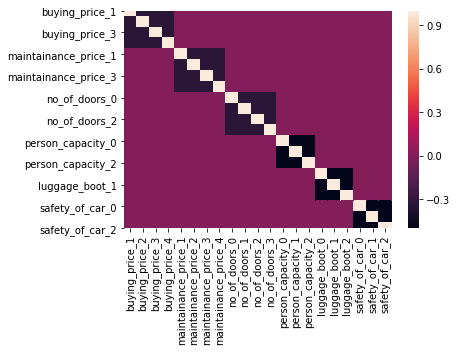

In [33]:
#Check the correlation of the features
correlationMatrix = dataframe.corr()
top_corr_features = correlationMatrix.index

#plot heat map
g=sns.heatmap(dataframe[top_corr_features].corr())

In [34]:
dataframe.describe()

,buying_price_1,buying_price_2,buying_price_3,buying_price_4,maintainance_price_1,maintainance_price_2,maintainance_price_3,maintainance_price_4,no_of_doors_0,no_of_doors_1,...,no_of_doors_3,person_capacity_0,person_capacity_1,person_capacity_2,luggage_boot_0,luggage_boot_1,luggage_boot_2,safety_of_car_0,safety_of_car_1,safety_of_car_2
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,...,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,...,0.250000,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
std,0.433138,0.433138,0.433138,0.433138,0.433138,0.433138,0.433138,0.433138,0.433138,0.433138,...,0.433138,0.471541,0.471541,0.471541,0.471541,0.471541,0.471541,0.471541,0.471541,0.471541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,...,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
dataframe.head()

,buying_price_1,buying_price_2,buying_price_3,buying_price_4,maintainance_price_1,maintainance_price_2,maintainance_price_3,maintainance_price_4,no_of_doors_0,no_of_doors_1,...,no_of_doors_3,person_capacity_0,person_capacity_1,person_capacity_2,luggage_boot_0,luggage_boot_1,luggage_boot_2,safety_of_car_0,safety_of_car_1,safety_of_car_2
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,1,0
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0


In [36]:
dataframe.shape

(1728, 21)

In [37]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 

for k in K: 
#Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(dataframe) 
    kmeanModel.fit(dataframe) 

    distortions.append(sum(np.min(cdist(dataframe, kmeanModel.cluster_centers_, 
    'euclidean'),axis=1)) / dataframe.shape[0]) 
    inertias.append(kmeanModel.inertia_) 

    mapping1[k] = sum(np.min(cdist(dataframe, kmeanModel.cluster_centers_, 
    'euclidean'),axis=1)) / dataframe.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 


In [38]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 


1 : 2.0615528128088116
2 : 2.0061216841324248
3 : 1.8929694486000719
4 : 1.8632716502454716
5 : 1.8328007929117018
6 : 1.8015568765987604
7 : 1.7800751365401632
8 : 1.7450391523196953
9 : 1.7182242600793254


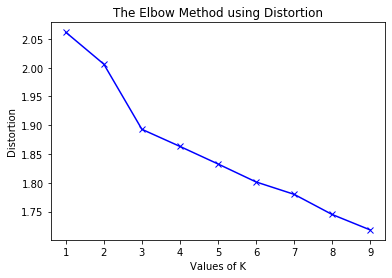

In [39]:
plt.plot(range(1,10), distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 


In [40]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

1 : 7344.0
2 : 6965.466229280268
3 : 6192.0
4 : 6000.0
5 : 5808.0
6 : 5616.0
7 : 5488.000000000001
8 : 5270.400000000001
9 : 5104.0


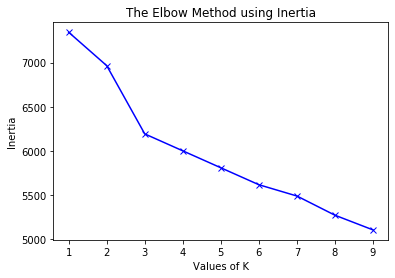

In [41]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [42]:
result_class.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [43]:
kmeans = KMeans(n_clusters=3,init = 'k-means++', max_iter = 100, random_state = 10)
kmeans.fit(dataframe)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [44]:
kmeans.cluster_centers_

array([[ 2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
         2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
         2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
         2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
         3.33333333e-01,  3.33333333e-01,  3.33333333e-01,
         3.33333333e-01,  3.33333333e-01,  3.33333333e-01,
         1.00000000e+00, -1.88737914e-15, -1.88737914e-15],
       [ 2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
         2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
         2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
         2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
         3.33333333e-01,  3.33333333e-01,  3.33333333e-01,
         3.33333333e-01,  3.33333333e-01,  3.33333333e-01,
        -1.88737914e-15, -1.88737914e-15,  1.00000000e+00],
       [ 2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
         2.50000000e-01,  2.50000000e-01,  2.50000000e-01,
         2.50000000e-01,  2.50000000e-01,  2.50000000e

In [45]:
kmeans.labels_

array([0, 2, 1, ..., 0, 2, 1])

In [46]:
result_class.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)